In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:

url = 'https://search.daum.net/search?w=news&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=%EC%A0%9C%EC%A1%B0&p=1'

response = requests.get(url)


In [3]:
if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    print(soup)
else:
    print('{} 응답.'.format(response.status_code))


<!DOCTYPE html>

<html class="unix unknown" lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head profile="http://a9.com/-/spec/opensearch/1.1/">
<meta content="text/html;charset=utf-8" http-equiv="content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="off" name="autocomplete"/>
<meta content="always" name="referrer"/>
<meta content="telephone=no" name="format-detection">
<meta content="제조 – Daum 검색" property="og:title"/>
<meta content="https://search.daum.net/search?w=news&amp;q=%EC%A0%9C%EC%A1%B0" property="og:url"/>
<meta content="Daum 검색에서 제조에 대한 최신정보를 찾아보세요." property="og:description"/>
<meta content="https://search1.daumcdn.net/search/statics/common/img/og_search.png" property="og:image"/>
<meta content="다음검색" property="og:site_name"/>
<title>제조 – Daum 검색</title>
<link href="//search.daum.net/OpenSearch.xml" rel="search" title="Daum" type="application/opensearchdescription+xml"/>
<link charset="utf-8" href="//search1.daumcdn.net/search/statics/comm

In [4]:
# '#newsColl > div.cont_divider > ul > li:nth-child(1) > div.wrap_cont > a'
# '#newsColl > div.cont_divider > ul > li:nth-child(2) > div.wrap_cont > a'
news_titles = soup.select('#newsColl > div.cont_divider > ul > li > div.wrap_cont > a')
news_titles

[<a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20211013173103250?f=o" onclick='smartLog(this, "dc=NNS&amp;d=265NO2uiCJgUHDJhg_&amp;pg=1&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16FyB2ukEzHjC3cheN&amp;e3=0&amp;ext=dsid=265NO2uiCJgUHDJhg_", event, {"cpid": {"value": "16FyB2ukEzHjC3cheN"}});' target="_blank">김근하 "<b>제조</b>업은 값싼 인건비가 최고?..AI·IoT로 '맞춤형 <b>제조</b>' 전환해야"</a>,
 <a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20211016055204157?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26zNpYXt6X3Jdr9KMR&amp;pg=1&amp;r=2&amp;p=4&amp;rc=10&amp;e1=16EJqgUM0mYHaQpZZ-&amp;e3=0&amp;ext=dsid=26zNpYXt6X3Jdr9KMR", event, {"cpid": {"value": "16EJqgUM0mYHaQpZZ-"}});' target="_blank">미 <b>제조</b>업지수 한달새 급락..공급망 대란 충격 현실로(종합)</a>,
 <a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20211013183317249?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26Y0GzJ02NcpvqSjFH&amp;pg=1&amp;r=3&amp;p=4&amp;rc=10&amp;e1=16xPi3xTTvS9eQchSd&amp;e3=0&amp;ext=dsid=26Y0GzJ02NcpvqSjFH", event, {"cpid":

In [5]:
for i, one_news in enumerate(news_titles):
    print('{}번째 기사제목 : {}'.format(i+1, one_news.text))

1번째 기사제목 : 김근하 "제조업은 값싼 인건비가 최고?..AI·IoT로 '맞춤형 제조' 전환해야"
2번째 기사제목 : 미 제조업지수 한달새 급락..공급망 대란 충격 현실로(종합)
3번째 기사제목 : [김규성 칼럼] 제조업 엑소더스 부추기는 정부
4번째 기사제목 : 톤28, 국제수준 COSMOS ORGANIC 제조 시설 인증
5번째 기사제목 : 국회·식약처 임의제조 처벌강화 공감, 법안 탄력받나
6번째 기사제목 : 김근하 대표 "중견·중소 제조업의 생존..스마트 플랫폼에 달렸다"
7번째 기사제목 : 중소 제조업 64.8% "주52시간제 힘들다"
8번째 기사제목 : 기저효과로 취업자 늘었지만..글로벌 공급망 쇼크로 경제 주축 제조업 일자리 '마이너스'
9번째 기사제목 : '30대'만 비껴간 고용시장 온기.."도소매업·제조업 부진 영향"
10번째 기사제목 : 포항시, 애플과 제조업 스마트도시 만들기 본격 추진


In [6]:
import pandas as pd 

In [7]:
dataframe = pd.DataFrame(columns=['제목'])
dataframe

,제목


In [8]:

for i, one_news in enumerate(news_titles):
    dataframe = dataframe.append({'제목' : one_news.text}, ignore_index=True)
dataframe

,제목
0,"김근하 ""제조업은 값싼 인건비가 최고?..AI·IoT로 '맞춤형 제조' 전환해야"""
1,미 제조업지수 한달새 급락..공급망 대란 충격 현실로(종합)
2,[김규성 칼럼] 제조업 엑소더스 부추기는 정부
3,"톤28, 국제수준 COSMOS ORGANIC 제조 시설 인증"
4,"국회·식약처 임의제조 처벌강화 공감, 법안 탄력받나"
5,"김근하 대표 ""중견·중소 제조업의 생존..스마트 플랫폼에 달렸다"""
6,"중소 제조업 64.8% ""주52시간제 힘들다"""
7,기저효과로 취업자 늘었지만..글로벌 공급망 쇼크로 경제 주축 제조업 일자리 '마이너스'
8,"'30대'만 비껴간 고용시장 온기..""도소매업·제조업 부진 영향"""
9,"포항시, 애플과 제조업 스마트도시 만들기 본격 추진"


In [9]:
dataframe = pd.DataFrame(columns=['제목'])
dataframe

,제목


In [10]:
for i, one_news in enumerate(news_titles):
    title = one_news.text.replace("'","")
    title = title.replace('"','')
    title = title.replace('\\','')
    dataframe = dataframe.append({'제목' : one_news.text}, ignore_index=True)
dataframe

,제목
0,"김근하 ""제조업은 값싼 인건비가 최고?..AI·IoT로 '맞춤형 제조' 전환해야"""
1,미 제조업지수 한달새 급락..공급망 대란 충격 현실로(종합)
2,[김규성 칼럼] 제조업 엑소더스 부추기는 정부
3,"톤28, 국제수준 COSMOS ORGANIC 제조 시설 인증"
4,"국회·식약처 임의제조 처벌강화 공감, 법안 탄력받나"
5,"김근하 대표 ""중견·중소 제조업의 생존..스마트 플랫폼에 달렸다"""
6,"중소 제조업 64.8% ""주52시간제 힘들다"""
7,기저효과로 취업자 늘었지만..글로벌 공급망 쇼크로 경제 주축 제조업 일자리 '마이너스'
8,"'30대'만 비껴간 고용시장 온기..""도소매업·제조업 부진 영향"""
9,"포항시, 애플과 제조업 스마트도시 만들기 본격 추진"


In [11]:
dataframe = pd.DataFrame(columns=['제목'])
for i in range(3):
    url = 'https://search.daum.net/search?w=news&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=%EC%A0%9C%EC%A1%B0&p=' + str(i+1)

    response = requests.get(url)
    if response.status_code == 200:
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')
        news_titles = soup.select('#newsColl > div.cont_divider > ul > li > div.wrap_cont > a')
        for i, one_news in enumerate(news_titles):
            one_news = one_news.text
            one_news = one_news.replace('\\','')
            one_news = one_news.replace('"','')
            one_news = one_news.replace("'",'')
            one_news = one_news.replace(",","")
            one_news = one_news.replace(".","")
            dataframe = dataframe.append({'제목' : one_news}, ignore_index=True)
            
    else:
        print('{} 응답.'.format(response.status_code))

In [12]:
dataframe.tail()

,제목
25,이산화탄소 배출없는 친환경 배터리 제조 공정 개발
26,SMATEC2021 ‘스마트 제조의 미래’로 컨퍼런스 개최
27,수소 제조부터 수송 현지 판매까지일본 종합상사의 수소사업
28,서울창업허브 아마존에서 제조 스타트업 키운다
29,1조 클럽 한국 제조기업코로나에도 2배 늘어


In [13]:
dataframe.to_csv('제조업검색 뉴스 제목.csv', sep=',', encoding='utf-8-sig', index=False)

!conda install -c conda-forge -y wordcloud

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
%matplotlib inline

In [15]:
new_title_csv = pd.read_csv('제조업검색 뉴스 제목.csv')
new_title_csv.tail()

,제목
25,이산화탄소 배출없는 친환경 배터리 제조 공정 개발
26,SMATEC2021 ‘스마트 제조의 미래’로 컨퍼런스 개최
27,수소 제조부터 수송 현지 판매까지일본 종합상사의 수소사업
28,서울창업허브 아마존에서 제조 스타트업 키운다
29,1조 클럽 한국 제조기업코로나에도 2배 늘어


In [16]:
title_list = list(np.array(new_title_csv['제목'].to_list()))
title_list

['김근하 제조업은 값싼 인건비가 최고?AI·IoT로 맞춤형 제조 전환해야',
 '미 제조업지수 한달새 급락공급망 대란 충격 현실로(종합)',
 '[김규성 칼럼] 제조업 엑소더스 부추기는 정부',
 '톤28 국제수준 COSMOS ORGANIC 제조 시설 인증',
 '국회·식약처 임의제조 처벌강화 공감 법안 탄력받나',
 '김근하 대표 중견·중소 제조업의 생존스마트 플랫폼에 달렸다',
 '중소 제조업 648% 주52시간제 힘들다',
 '기저효과로 취업자 늘었지만글로벌 공급망 쇼크로 경제 주축 제조업 일자리 마이너스',
 '30대만 비껴간 고용시장 온기도소매업·제조업 부진 영향',
 '포항시 애플과 제조업 스마트도시 만들기 본격 추진',
 '취업자 67만 명 늘어났지만제조·대면서비스는 여전히 고전',
 '3·4분기 제조업 경기 먹구름대부분 업종 BSI 하락세',
 '포항시 애플과 함께 제조업 스마트화 신산업 육성 나서',
 '4분기 제조업 경기 기대감 주춤디스플레이·조선 하락 전망',
 '제조 메타버스로 경남 스마트 제조혁신 대비한다',
 '외국인근로자 5만8천명 감소제조업체 65% 쿼터 확대',
 '친환경 플라스틱 제조 최적화된 금형 설비 개발된다',
 '절대 공유 못해모더나가 백신 제조법 공개 안하는 진짜 이유',
 '충북 스마트공장 구축으로 제조혁신 선두 노린다',
 '새만금산단 차세대 태양전지 제조기업 대형 투자협약',
 '투자받기 힘든 제조 스타트업 안 망하려 온종일 로봇과 씨름',
 'KATECH 제조기술연구센터 차량부품 평가인증 지원 기반구축사업 완료',
 '모더나 코로나 백신 제조법 공유 안한다자체 생산이 최선',
 '자영업·도소매·제조업 여전히 어려워완전한 고용 회복 먼 길',
 '울산보건환경연구원 식품 제조용 지하수 바이러스 검사',
 '이산화탄소 배출없는 친환경 배터리 제조 공정 개발',
 'SMATEC2021 ‘스마트 제조의 미래’로 컨퍼런스 개최',
 '수소 제조부터 수송 현지 판매까지일본 종합상사의 수소사업',
 '서울창업허브 아마존에서 

In [17]:
width = 640
height = 480
font = 'C:/Windows/Fonts/batang.ttc'  # 윈도우의 폰트 경로 
# font = '/system'

stop_words = '제조업, 제조'
max_words = 100
backgroud_color = 'black'
max_font_size = 100
min_font_size = 1

colormap = 'rainbow_r'

wordcloud = WordCloud(
    width=width,
    height=height,
    font_path = font,
    max_font_size=max_font_size,
    min_font_size=min_font_size,
    max_words=max_words,
    background_color=backgroud_color,
    stopwords=stop_words
    
                        )

In [18]:
wordcloud = wordcloud.generate_from_text(' '.join(title_list))

In [19]:
wordcloud_array = wordcloud.to_array()

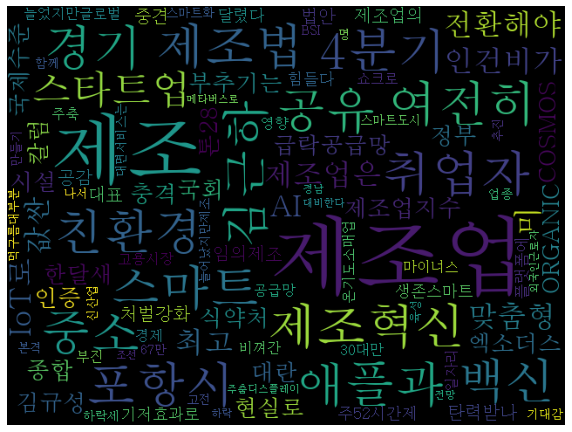

In [20]:
fig = plt.figure(figsize = (10,10))
plt.imshow(wordcloud_array)
plt.axis('off')
plt.show()

!pip install opencv-python

In [52]:
import cv2
word_mask = np.array(cv2.imread('word_mask.png'))

In [53]:

wordcloud = WordCloud(
    width=width,
    height=height,
    font_path = font,
    max_font_size=max_font_size,
    min_font_size=min_font_size,
    max_words=max_words,
    background_color=backgroud_color,
    stopwords=stop_words,
    
    mask=word_mask
    
                        )

In [54]:
wordcloud = wordcloud.generate_from_text(' '.join(title_list))

In [55]:
wordcloud_array = wordcloud.to_array()

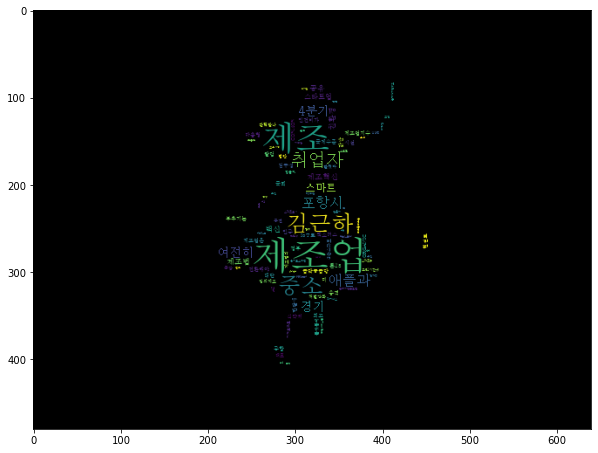

In [56]:
fig = plt.figure(figsize = (10,10))
plt.imshow(wordcloud_array)
# plt.axis('off')
plt.show()

In [46]:
fig.savefig('word_cloud.png')

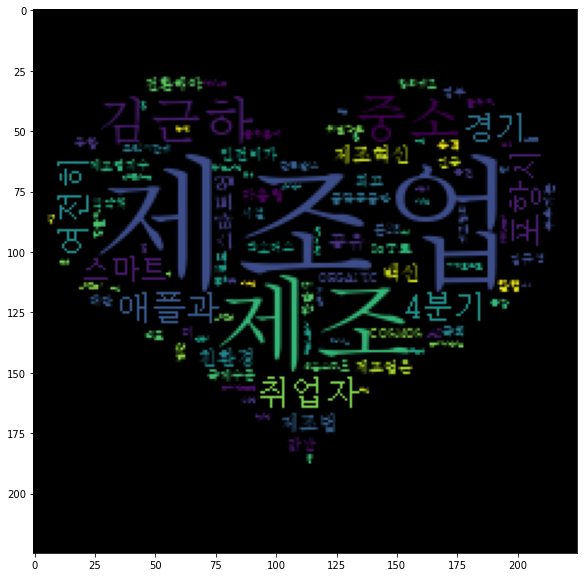

In [58]:
word_mask2 = np.array(cv2.imread('word_mask2.png'))
width = 225
height = 225
wordcloud = WordCloud(
    width=width,
    height=height,
    font_path = font,
    max_font_size=max_font_size,
    min_font_size=min_font_size,
    max_words=max_words,
    background_color=backgroud_color,
    stopwords=stop_words,
    
    mask=word_mask2
    
                        )
wordcloud = wordcloud.generate_from_text(' '.join(title_list))
wordcloud_array = wordcloud.to_array()
fig = plt.figure(figsize = (10,10))
plt.imshow(wordcloud_array)
# plt.axis('off')
plt.show()

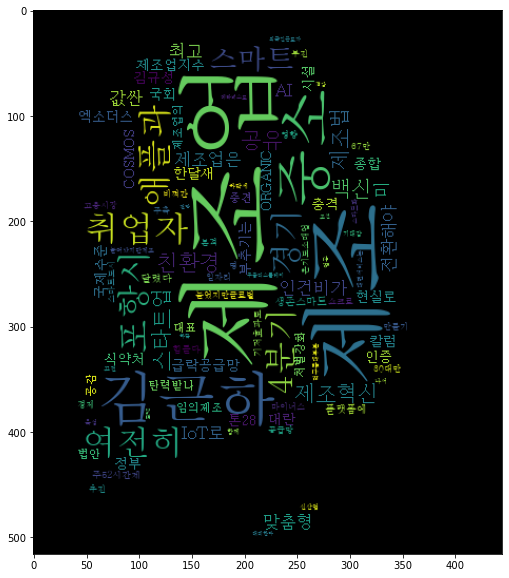

In [65]:
word_mask4 = np.array(cv2.imread('word_mask4.png'))
width = 195
height = 259
wordcloud = WordCloud(
    width=width,
    height=height,
    font_path = font,
    max_font_size=max_font_size,
    min_font_size=min_font_size,
    max_words=max_words,
    background_color=backgroud_color,
    stopwords=stop_words,
    
    mask=word_mask4
    
                        )
wordcloud = wordcloud.generate_from_text(' '.join(title_list))
wordcloud_array = wordcloud.to_array()
fig = plt.figure(figsize = (10,10))
plt.imshow(wordcloud_array)
# plt.axis('off')
plt.show()